# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
import seaborn as sb
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0,8.0]
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# Putting the csv files in pandas dataframe

In [2]:
df1 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/SHSY5Y_mutations_PAM.csv')
df2 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/SKNAS_mutations_PAM.csv')
df3 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/SKNBE2_mutations_PAM.csv')
df4 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/SKNDZ_mutations_PAM.csv')
df5 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/SKNFI_mutations_PAM.csv')
df6 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/TARGET-NBL-population_mutations_PAM.csv')

# Drop some columns 

In [3]:
df1 = df1.drop(['Unnamed: 0','X', 'strand'], axis=1)
df2 = df2.drop(['Unnamed: 0','X', 'strand'], axis=1)
df3 = df3.drop(['Unnamed: 0','X', 'strand'], axis=1)
df4 = df4.drop(['Unnamed: 0','X', 'strand'], axis=1)
df5 = df5.drop(['Unnamed: 0','X', 'strand'], axis=1)
df6 = df6.drop(['Unnamed: 0','strand'], axis=1)

# Concat the 6 dataframes 

In [4]:
frames = [df1, df2, df3, df4, df5, df6]
df = pd.concat(frames)

# View the new dataframe

In [5]:
df.head()

chrname  position mutation_type  IsNewPAM
0    chr1    989314           G>A     False
1    chr1   2339903           C>G      True
2    chr1   7887389           C>T     False
3    chr1  12854576           A>T     False
4    chr1  24981465           G>A     False

# View the datatype of the variables 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6534 entries, 0 to 5137
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   chrname        6534 non-null   object
 1   position       6534 non-null   int64 
 2   mutation_type  6534 non-null   object
 3   IsNewPAM       6534 non-null   bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 210.6+ KB


# Unique chromosones in the dataset

In [7]:
df.chrname.unique()

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr22',
       'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX',
       'chr21', 'chrM', 'chrY'], dtype=object)

# Unique mutations in the dataset

In [8]:
df.mutation_type.unique()

array(['G>A', 'C>G', 'C>T', 'A>T', 'A>C', 'C>A', 'G>C', 'A>G', 'T>G',
       'T>C', 'G>T', 'T>A'], dtype=object)

# Changing the datatype of both chrname and mutation type to int64

In [9]:
df["chrname"] = df["chrname"].map({"chr1" : 1,"chr2" : 2,"chr3" : 3, "chr4" : 4,"chr5" : 5, "chr6" : 6, "chr7" : 7, "chr8" : 8, "chr9" : 9, "chr10" : 10,"chr11" : 11, "chr12" : 12, "chr13" : 13, "chr14" : 14, "chr15" : 15, "chr16" : 16, "chr17" : 17, "chr18" : 18, "chr19" : 19, "chr20" : 20, "chr21" : 21, "chr22" : 22,"chrX" : 23, "chrY" : 24, "chrM" : 25})
df['mutation_type'] = df['mutation_type'].map({"T>A" : 1, "C>A" : 2, "A>C" : 3, "G>C" : 4, "C>T" : 5, "G>T" : 6, "T>G" : 7, "G>A" : 8, "C>G" : 9, "T>C" : 10, "A>T" : 11, "A>G" : 12})

In [10]:
df.head()

chrname  position  mutation_type  IsNewPAM
0        1    989314              8     False
1        1   2339903              9      True
2        1   7887389              5     False
3        1  12854576             11     False
4        1  24981465              8     False

# Checking for missing values in the dataframe

In [11]:
df.isna().sum()

chrname          0
position         0
mutation_type    0
IsNewPAM         0
dtype: int64

# data summary

In [12]:
df.describe()

chrname      position  mutation_type
count  6534.000000  6.534000e+03    6534.000000
mean     10.203704  7.719282e+07       5.944904
std       6.722733  5.805052e+07       2.919717
min       1.000000  4.755000e+03       1.000000
25%       4.000000  3.205967e+07       4.000000
50%      10.000000  6.141789e+07       6.000000
75%      16.000000  1.161858e+08       8.000000
max      25.000000  2.491505e+08      12.000000

# Correlation Analysis

In [13]:
df.corr()

chrname  position  mutation_type  IsNewPAM
chrname        1.000000 -0.496270      -0.016117 -0.001476
position      -0.496270  1.000000       0.016301  0.001971
mutation_type -0.016117  0.016301       1.000000  0.311404
IsNewPAM      -0.001476  0.001971       0.311404  1.000000

# Correlation heatmap

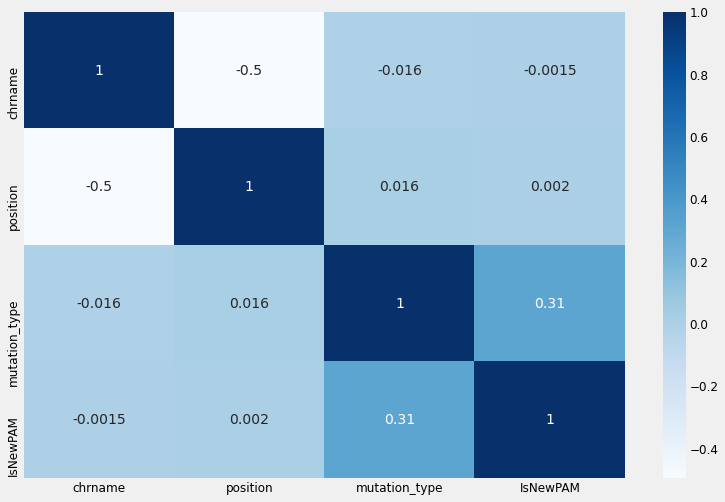

In [14]:
sb.heatmap(df.corr(), cmap="Blues", annot=True)

# Frequency of different mutation types in the data set

In [15]:
df["mutation_type"].value_counts()

6     1256
2     1214
5     1118
8     1106
10     325
12     313
9      309
4      292
11     196
1      168
3      124
7      113
Name: mutation_type, dtype: int64

# Visualization plot of mutation types 

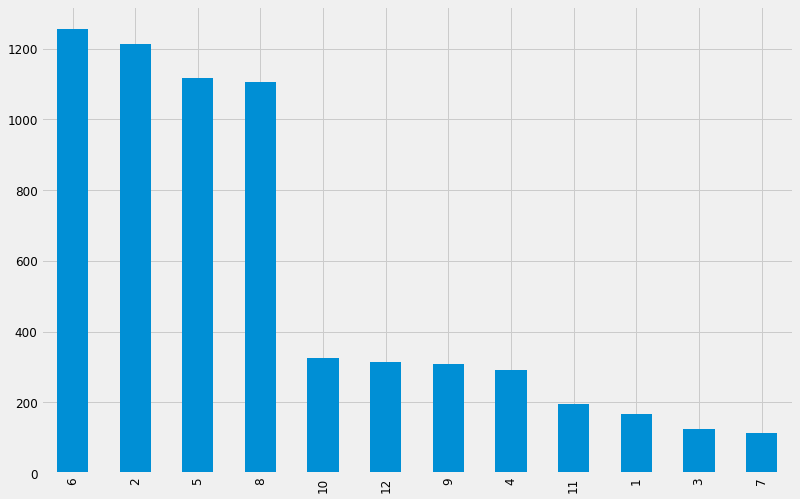

In [16]:
df["mutation_type"].value_counts().plot(kind="bar")

# Frequency of different Chromosomes in the data set

In [17]:
df["chrname"].value_counts()

1     680
19    471
11    442
17    437
2     436
12    374
3     348
5     341
6     332
7     330
4     271
23    247
9     236
16    224
10    223
8     203
14    191
15    186
20    157
18    122
22    118
13    109
21     49
24      4
25      3
Name: chrname, dtype: int64

# Visualization plot of Chromosomes 

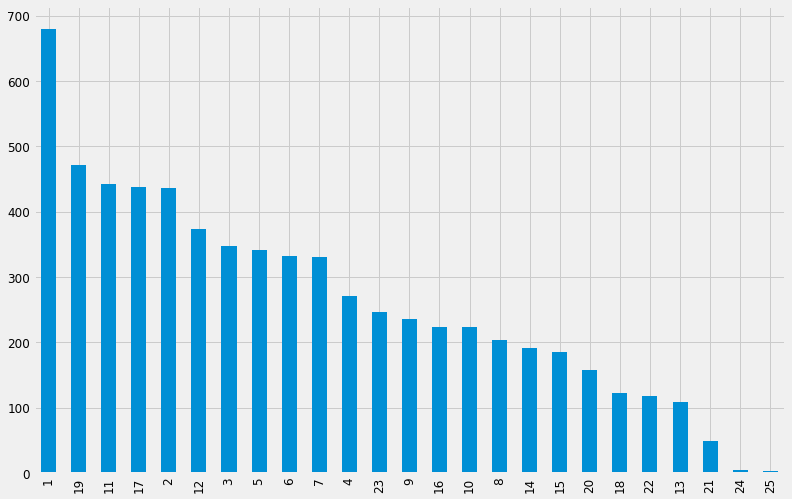

In [18]:
df["chrname"].value_counts().plot(kind="bar")

# Frequency of boolean PAM site

In [19]:
df["IsNewPAM"].value_counts()

False    6237
True      297
Name: IsNewPAM, dtype: int64

# Visualization of boolean PAM site

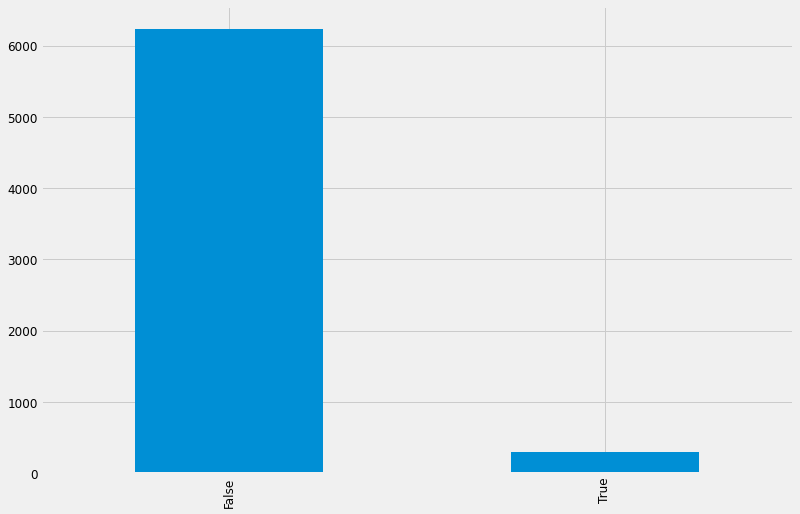

In [20]:
df["IsNewPAM"].value_counts().plot(kind="bar")

# Calculation of the percentages of each boolean PAM site

In [21]:
count_no_NewPAM = len(df[df['IsNewPAM']==False])
count_NewPAM = len(df[df['IsNewPAM']==True])
pct_of_no_NewPAM = count_no_NewPAM/(count_no_NewPAM+count_NewPAM)
print("percentage of no new PAM is", pct_of_no_NewPAM*100)
pct_of_NewPAM = count_NewPAM/(count_no_NewPAM+count_NewPAM)
print("percentage of new PAM is",pct_of_NewPAM*100)

percentage of no new PAM is 95.45454545454545
percentage of new PAM is 4.545454545454546


Our classes are imbalanced, that ratio of no new PAM to new PAM is 95:5

# Average of other variable based on PAM

In [22]:
df.groupby('IsNewPAM').mean()

chrname      position  mutation_type
IsNewPAM                                        
False     10.205868  7.716785e+07       5.746513
True      10.158249  7.771708e+07      10.111111

The average mutation type of new PAM(True) is greater than that of the no new PAM(False)

# Visualizaton of value counts of each mutation types in each chromosones

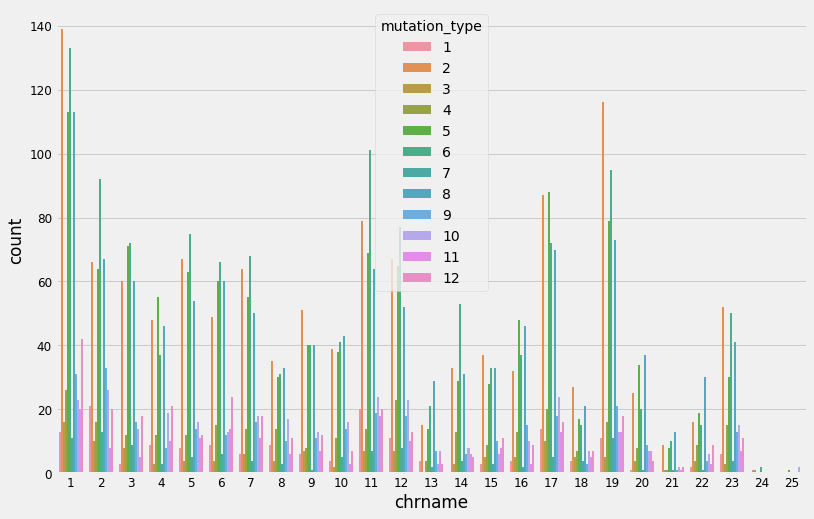

In [23]:
sns.countplot("chrname", hue='mutation_type', data=df)

# Percentage pie chart plot of each mutation types in each chromosomes

In [24]:
import plotly.express as px
 
fig = px.pie(df.mutation_type, df.chrname, 
             color_discrete_sequence=px.colors.sequential.RdBu)
 
fig.update_traces(textposition='outside', 
                  textinfo='percent+label+value',
                  marker=dict(line=dict(color='#FFFFFF', width=2)),
                  textfont_size=7)

 
fig.show()

# Stacked Bar Chart of Chromosome VS Mutation Type

Text(0, 0.5, 'Proportion of Mutation type')

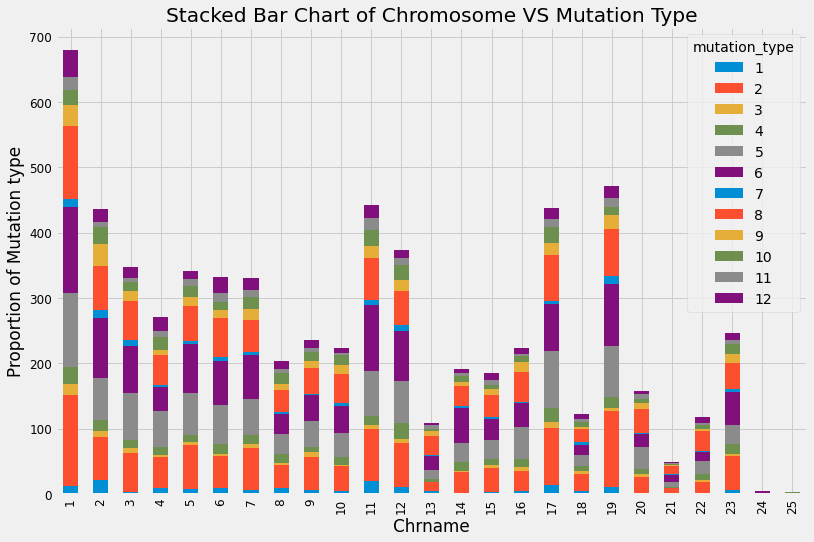

In [25]:
pd.crosstab(df.chrname,df.mutation_type).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Chromosome VS Mutation Type')
plt.xlabel('Chrname')
plt.ylabel('Proportion of Mutation type')

# Value counts of PAM site in each chromosones

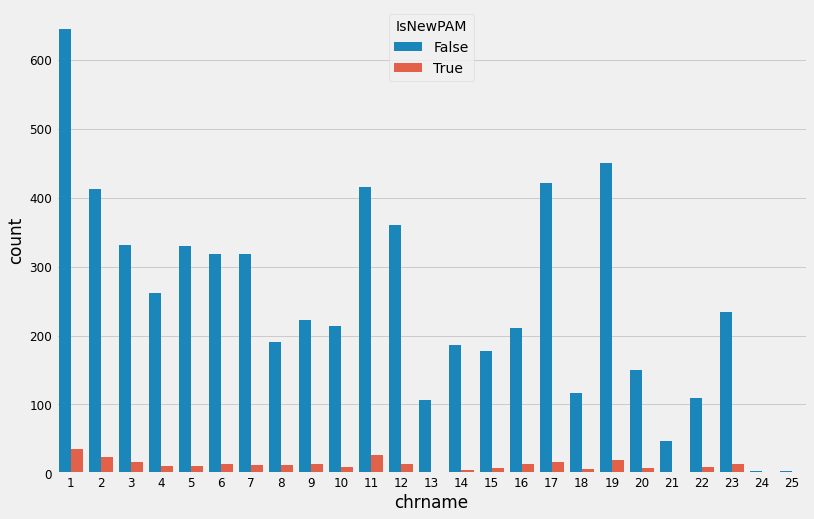

In [26]:
sns.countplot("chrname", hue='IsNewPAM', data=df)

# Value counts of PAM site in each mutation types

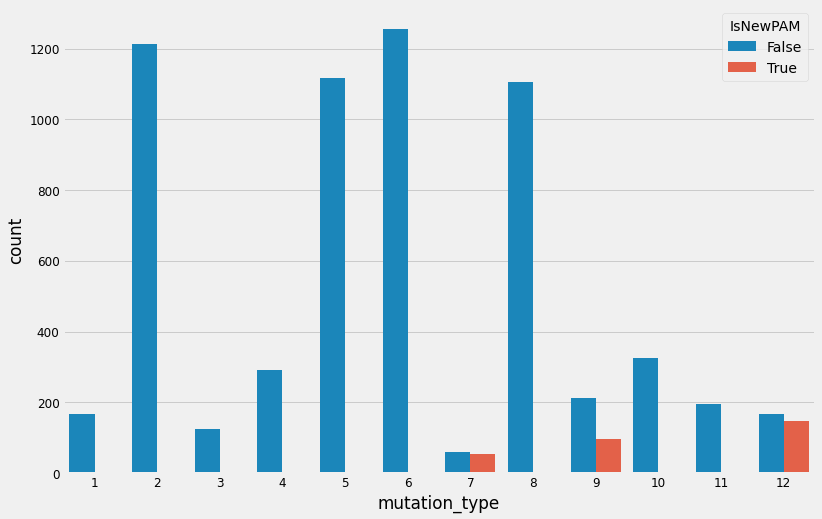

In [27]:
sns.countplot("mutation_type", hue='IsNewPAM', data=df)

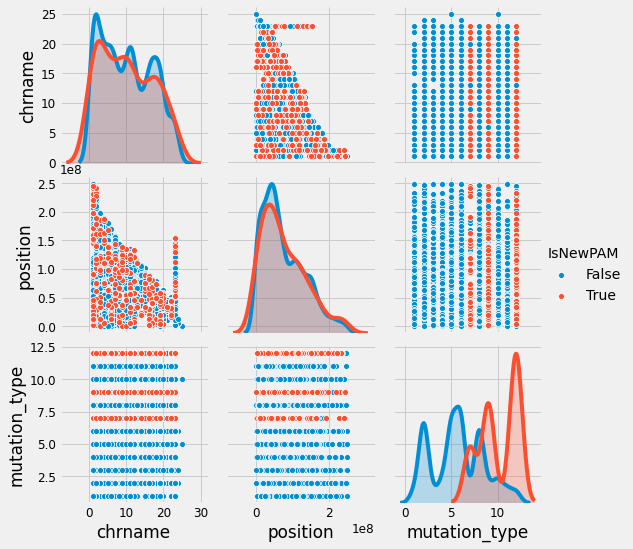

In [28]:
sns.pairplot(df,hue='IsNewPAM')

# Classification Analysis

Find a classification algorithm that predicts if a mutation comes from either a cell line or the TARGET-NBL study

Merge all rows from all mutation data sets for cell lines and give them an extra column IsCellLine with the value TRUE for all rows

Add another column IsCellLine to the TARGET-NBL mutation data set with the value FALSE for all rows

Merge all cell line data sets with the TARGET-NBL mutation data set

Releveant columns/features: chrname, position, mutation_type

Outcome variable: IsCellLine

In [29]:
df_1 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/SHSY5Y_mutations_processed.csv')
df_2 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/SKNAS_mutations_processed.csv')
df_3 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/SKNBE2_mutations_processed.csv')
df_4 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/SKNDZ_mutations_processed.csv')
df_5 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/SKNFI_mutations_processed.csv')
df_6 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/SKNBE2_mutations_PAM_Hg38_annotated.csv')
df_7 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/SKNSH_mutations_PAM_Hg38_annotated.csv')
df_8 = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/TARGET-NBL-population_mutations_processed.csv')

In [30]:
df_8.head()

chrname   position mutation_type strand
0   chr17   47619753           T>A      +
1    chr2  209694558           C>A      +
2    chr2   55295644           A>C      +
3    chr6  151548416           G>C      +
4    chr3   41911351           C>T      +

In [31]:
df_1 = df_1.drop(['Unnamed: 0', 'strand'], axis=1)
df_2 = df_2.drop(['Unnamed: 0', 'strand'], axis=1)
df_3 = df_3.drop(['Unnamed: 0', 'strand'], axis=1)
df_4 = df_4.drop(['Unnamed: 0', 'strand'], axis=1)
df_5 = df_5.drop(['Unnamed: 0', 'strand'], axis=1)
df_6 = df_6.drop(['Unnamed: 0', 'strand','IsNewPAM','H3K4me1','H3K9me3','dist_H3K4me1','dist_H3K9me3','Genes','Promoters','IsPromoter','IsGene'], axis=1)
df_7 = df_7.drop(['Unnamed: 0', 'strand','IsNewPAM','H3K9ac','H3K27ac','H3K4me2','dist_H3K9ac','dist_H3K27ac','dist_H3K4me2','Genes','Promoters','Ispromoter','IsGene'], axis=1)
df_8 = df_8.drop('strand', axis=1)

In [32]:
df_6.rename(columns = {'seqnames':'chrname'}, inplace = True)
df_7.rename(columns = {'seqnames':'chrname'}, inplace = True)

In [33]:
df_1['IsCellLine'] = True
df_2['IsCellLine'] = True
df_3['IsCellLine'] = True
df_4['IsCellLine'] = True
df_5['IsCellLine'] = True
df_6['IsCellLine'] = True
df_7['IsCellLine'] = True
df_8['IsCellLine'] = False

In [34]:
frames1 = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8]
df_new = pd.concat(frames1)

In [35]:
df_new.head()

chrname  position mutation_type  IsCellLine
0    chr1    989314           G>A        True
1    chr1   2339903           C>G        True
2    chr1   7887389           C>T        True
3    chr1  12854576           A>T        True
4    chr1  24981465           G>A        True

In [36]:
df_new['IsCellLine'].value_counts()

False    5138
True     1859
Name: IsCellLine, dtype: int64

In [37]:
df_new["chrname"] = df_new["chrname"].map({"chr1" : 1,"chr2" : 2,"chr3" : 3, "chr4" : 4,"chr5" : 5, "chr6" : 6, "chr7" : 7, "chr8" : 8, "chr9" : 9, "chr10" : 10,"chr11" : 11, "chr12" : 12, "chr13" : 13, "chr14" : 14, "chr15" : 15, "chr16" : 16, "chr17" : 17, "chr18" : 18, "chr19" : 19, "chr20" : 20, "chr21" : 21, "chr22" : 22,"chrX" : 23, "chrY" : 24, "chrM" : 25})
df_new['mutation_type'] = df_new['mutation_type'].map({"T>A" : 1, "C>A" : 2, "A>C" : 3, "G>C" : 4, "C>T" : 5, "G>T" : 6, "T>G" : 7, "G>A" : 8, "C>G" : 9, "T>C" : 10, "A>T" : 11, "A>G" : 12})

In [38]:
df_new.shape

(6997, 4)

In [39]:
df_new.isna().sum()

chrname          0
position         0
mutation_type    0
IsCellLine       0
dtype: int64

In [40]:
# Create X 
X = df_new.iloc[:, 0:3]

# Create y (only the target column)
y = df_new["IsCellLine"]

In [41]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5247, 3), (1750, 3), (5247,), (1750,))

In [43]:
y_train.value_counts()

False    3853
True     1394
Name: IsCellLine, dtype: int64

In [44]:
y_test.value_counts()

False    1285
True      465
Name: IsCellLine, dtype: int64

In [45]:
# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier()

In [46]:
# Fit the RandomForestClassifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
# Use the fitted model to make predictions on the test data and
# save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

In [48]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train, y_train)

1.0

In [49]:
# Evaluate the fitted model on the test set using the score() function
clf.score(X_test, y_test)

0.7097142857142857

In [50]:
# Import xgboost from sklearn's svm module
from xgboost import XGBClassifier

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

In [51]:
# The models dictionary contains 5 models
models = {"XGBoost": XGBClassifier(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

# Create an empty dictionary called results
results = {}

In [52]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

{'XGBoost': 0.7194285714285714,
 'KNN': 0.6857142857142857,
 'SVC': 0.7342857142857143,
 'LogisticRegression': 0.7342857142857143,
 'RandomForestClassifier': 0.7142857142857143}

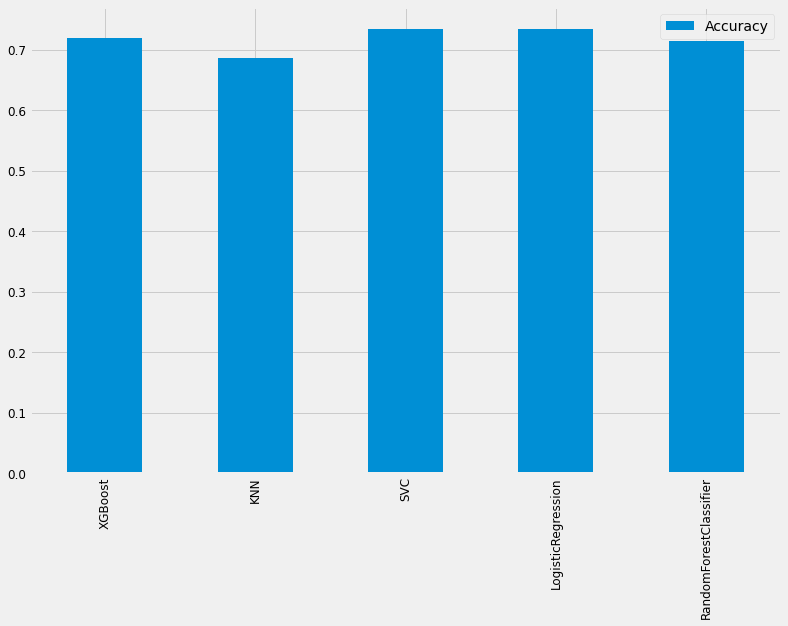

In [53]:
#Showing the performance of each of the classifiers using bar charts
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar();


Confusion matrix:
 [[1047  238]
 [ 270  195]]


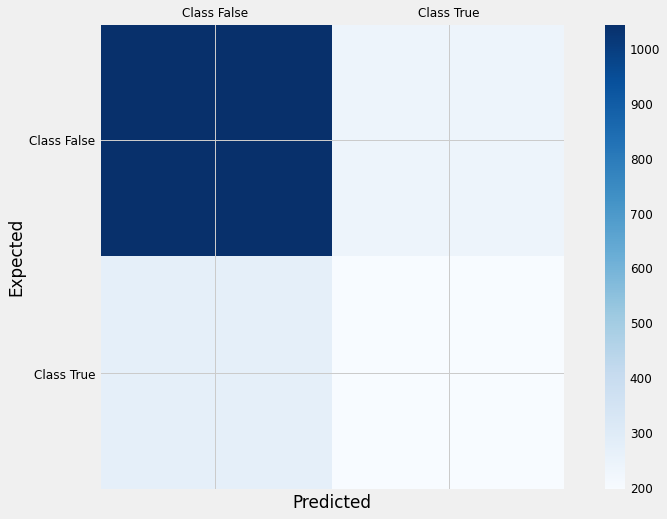

In [54]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class False', 'Class True']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [55]:
#a. TN / True Negative: 1047 case was False and predicted False
#b. TP / True Positive: 195 case was True and predicted True
#c. FN / False Negative: 270 case was True but predicted False
#d. FP / False Positive: 238 case was False but predicted True

The result is telling us that we have 1071+214 correct predictions and 253+212 incorrect predictions

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.81      0.81      0.81      1308
        True       0.43      0.43      0.43       442

    accuracy                           0.71      1750
   macro avg       0.62      0.62      0.62      1750
weighted avg       0.71      0.71      0.71      1750



In [57]:
#for model_name, model in models.items():
   # plot_roc_curve(model, X_test, y_test);

# PCA

In [58]:
df_new.head()

chrname  position  mutation_type  IsCellLine
0        1    989314              8        True
1        1   2339903              9        True
2        1   7887389              5        True
3        1  12854576             11        True
4        1  24981465              8        True

In [59]:
df_new1 = df_new[['chrname','position','mutation_type']]

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
scaler.fit(df_new1)

StandardScaler()

In [62]:
scaled_data = scaler.transform(df_new1)

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components=2)

In [65]:
pca.fit(scaled_data)

PCA(n_components=2)

In [66]:
x_pca = pca.transform(scaled_data)

In [67]:
scaled_data.shape

(6997, 3)

In [68]:
x_pca.shape

(6997, 2)

Text(0, 0.5, 'Second Principal Component')

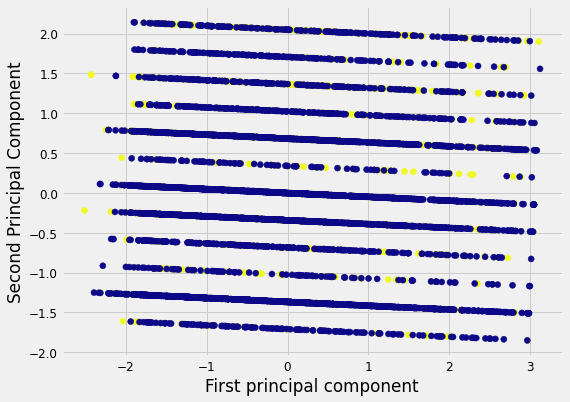

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_new['IsCellLine'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [70]:
pca.components_

array([[-0.70625413,  0.70630438,  0.04836559],
       [ 0.0352409 , -0.03315838,  0.99882861]])

In [71]:
df_comp = pd.DataFrame(pca.components_)
df_comp.columns =['chrname', 'position', 'mutation_type']
df_comp

chrname  position  mutation_type
0 -0.706254  0.706304       0.048366
1  0.035241 -0.033158       0.998829

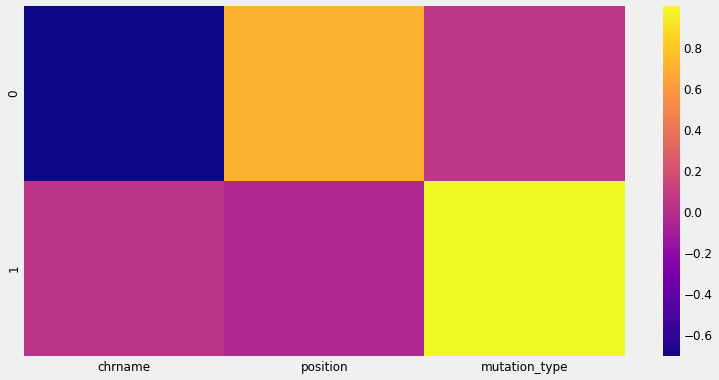

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

# KMeans Clustering

# 2nd approach for ML 

Identify hidden clusters of mutations from the population-based data

Data set: TARGET-NBL-population_mutations_processed.csv + methylation_counts.csv

Releveant columns/features: chrname, position, mutation_type, methylation_count

In [73]:
df_k = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/methylation_counts.csv')

In [74]:
df_k.columns =['chrname', 'position', 'mutation_type', 'strand','meth']

In [75]:
df_k.isna().sum()

chrname          0
position         0
mutation_type    0
strand           0
meth             0
dtype: int64

In [76]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   chrname        5137 non-null   object
 1   position       5137 non-null   int64 
 2   mutation_type  5137 non-null   object
 3   strand         5137 non-null   object
 4   meth           5137 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 200.8+ KB


In [77]:
df_k['chrname'].unique()

array(['chr2', 'chr6', 'chr3', 'chr10', 'chr9', 'chr11', 'chr7', 'chr19',
       'chr17', 'chrX', 'chr8', 'chr1', 'chr14', 'chr13', 'chr21', 'chr4',
       'chr5', 'chr18', 'chr12', 'chr20', 'chr16', 'chr22', 'chr15',
       'chrY'], dtype=object)

In [78]:
df_k['mutation_type'].unique()

array(['C>A', 'A>C', 'G>C', 'C>T', 'G>T', 'T>G', 'G>A', 'C>G', 'T>A',
       'T>C', 'A>T', 'A>G'], dtype=object)

In [79]:
df_k["chrname"] = df_k["chrname"].map({"chr1" : 1,"chr2" : 2,"chr3" : 3, "chr4" : 4,"chr5" : 5, "chr6" : 6, "chr7" : 7, "chr8" : 8, "chr9" : 9, "chr10" : 10,"chr11" : 11, "chr12" : 12, "chr13" : 13, "chr14" : 14, "chr15" : 15, "chr16" : 16, "chr17" : 17, "chr18" : 18, "chr19" : 19, "chr20" : 20, "chr21" : 21, "chr22" : 22,"chrX" : 23, "chrY" : 24})
df_k['mutation_type'] = df_k['mutation_type'].map({"T>A" : 1, "C>A" : 2, "A>C" : 3, "G>C" : 4, "C>T" : 5, "G>T" : 6, "T>G" : 7, "G>A" : 8, "C>G" : 9, "T>C" : 10, "A>T" : 11, "A>G" : 12})

In [80]:
df_k.head()

chrname   position  mutation_type strand  meth
0        2  209694558              2      +     0
1        2   55295644              3      +     0
2        6  151548416              4      +     0
3        3   41911351              5      +     0
4       10  103447445              5      +   109

In [81]:
df_k.drop('strand',axis =1, inplace = True)

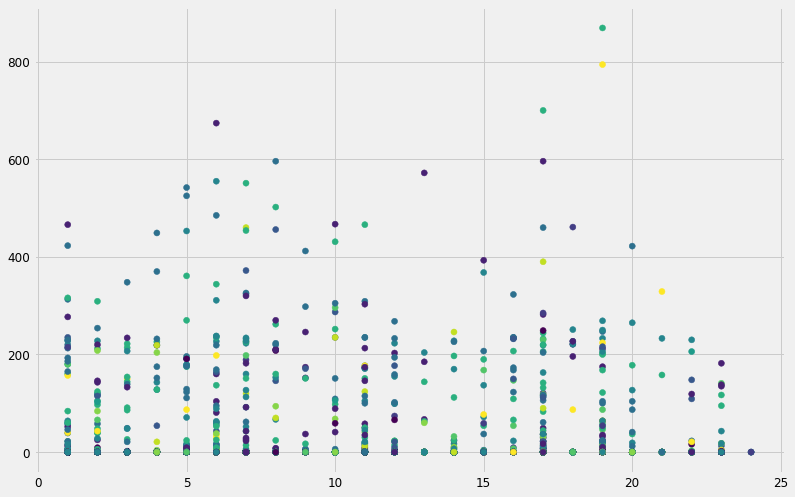

In [82]:
plt.scatter(df_k['chrname'],df_k['meth'],c=df_k['mutation_type'],cmap='viridis');

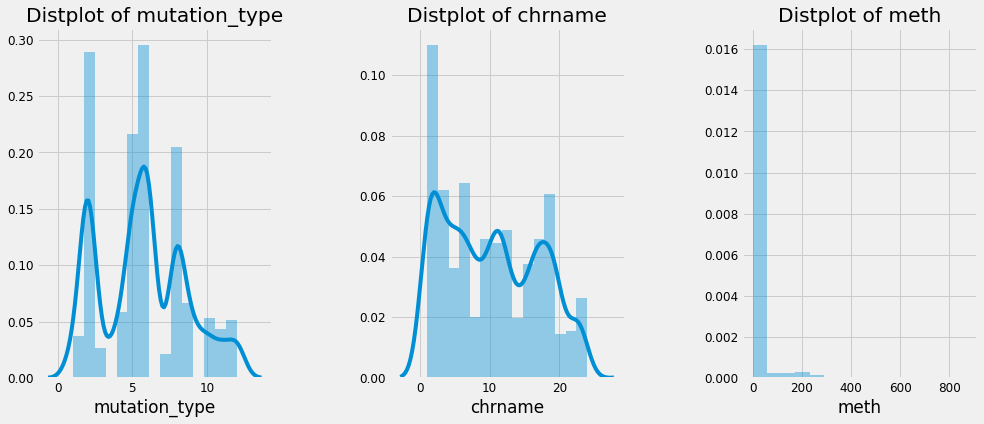

In [83]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['mutation_type' , 'chrname' , 'meth']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df_k[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

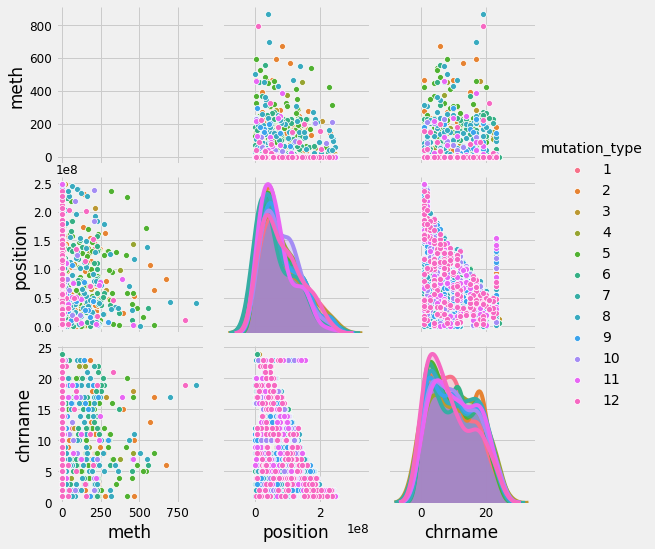

In [84]:
sns.pairplot(df_k, vars = ['meth', 'position', 'chrname'], hue = "mutation_type")

# 2 Dimensional Clustering based on Mutation Types and Methylation

In [86]:
from sklearn.cluster import KMeans

In [87]:
X1 = df_k[['mutation_type','meth']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

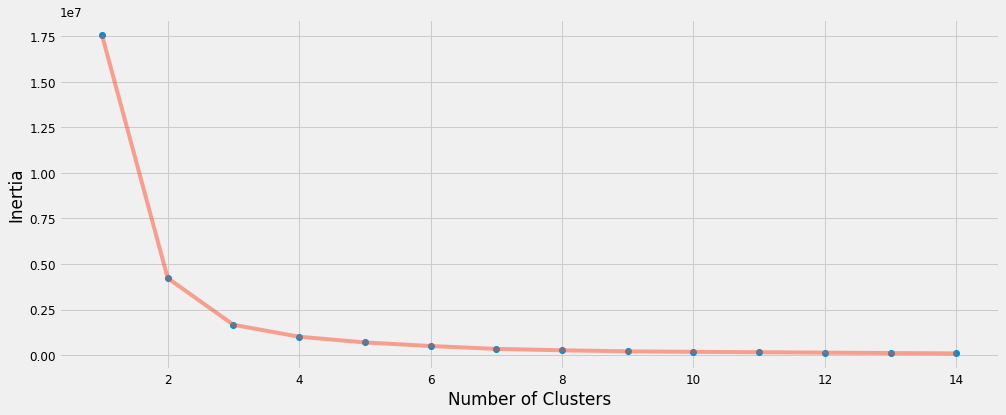

In [88]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [89]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [90]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

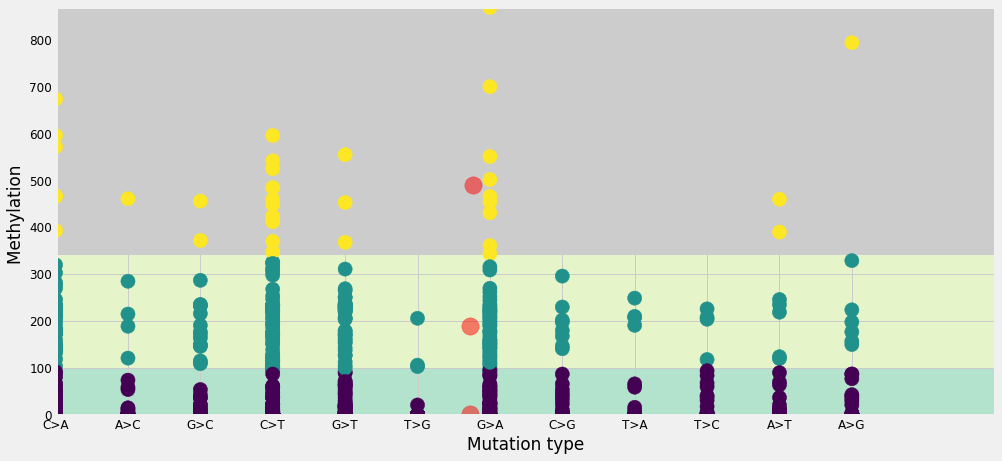

In [96]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( df_k.mutation_type.map({ 1 : "T>A", 2 : "C>A", 3 : "A>C", 4 : "G>C", 5 : "C>T", 6 : "G>T", 7 : "T>G", 8 :"G>A", 9 : "C>G", 10 : "T>C", 11 : "A>T", 12 :"A>G" }), y = 'meth', data = df_k, c = labels1, s = 200)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)

plt.ylabel('Methylation ') , plt.xlabel('Mutation type')
plt.show()

# 3D Clustering Chromosomes , Mutation Types  and Methylation

In [97]:
from sklearn.cluster import KMeans

In [99]:
X3 = df_k[['chrname' , 'mutation_type' ,'meth']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

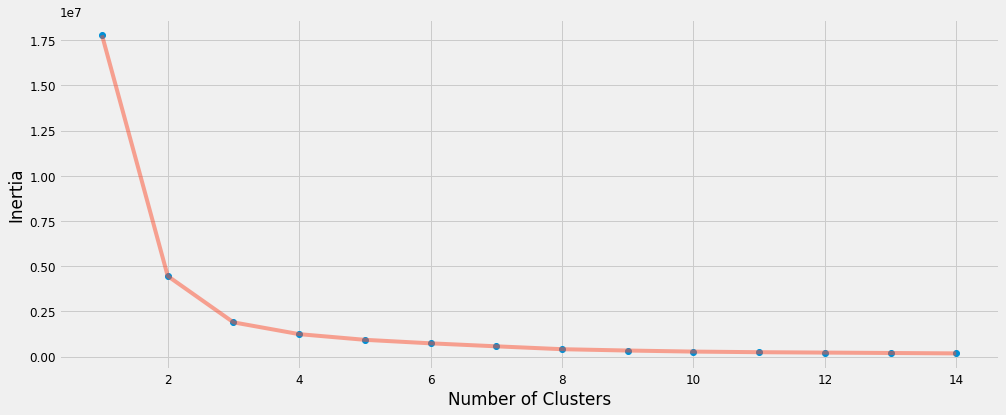

In [100]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [101]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df_k['cluster'] = pd.DataFrame(y_kmeans)
df_k.head()

chrname   position  mutation_type  meth  cluster
0        2  209694558              2     0        0
1        2   55295644              3     0        0
2        6  151548416              4     0        0
3        3   41911351              5     0        0
4       10  103447445              5   109        2

In [102]:
df_k.cluster.value_counts()

0    4872
2     230
1      35
Name: cluster, dtype: int64

In [103]:
df_k_new = df_k[['chrname','position','mutation_type','meth']]

In [106]:
scaler = StandardScaler()
scaler.fit(df_k_new)

StandardScaler()

In [107]:
scaled_data1 = scaler.transform(df_k_new)

In [108]:
pca1 = PCA(n_components=2)

In [109]:
pca1.fit(scaled_data1)

PCA(n_components=2)

In [110]:
x_pca1 = pca1.transform(scaled_data1)

In [111]:
scaled_data1.shape

(5137, 4)

In [112]:
x_pca1.shape

(5137, 2)

Text(0, 0.5, 'Second Principal Component')

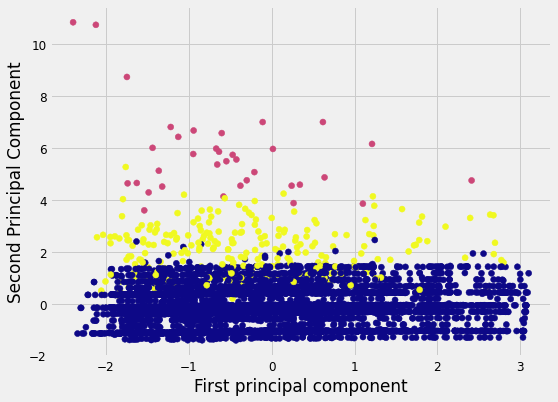

In [113]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca1[:,0],x_pca1[:,1],c=df_k['cluster'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [114]:
pca1.components_

array([[-0.70520982,  0.70666934,  0.02185903, -0.05310115],
       [-0.03887808, -0.00844001,  0.71476451,  0.69823274]])

In [115]:
df_comp_1 = pd.DataFrame(pca1.components_)
df_comp_1.columns =['chrname', 'position', 'mutation_type','meth']
df_comp_1

chrname  position  mutation_type      meth
0 -0.705210  0.706669       0.021859 -0.053101
1 -0.038878 -0.008440       0.714765  0.698233

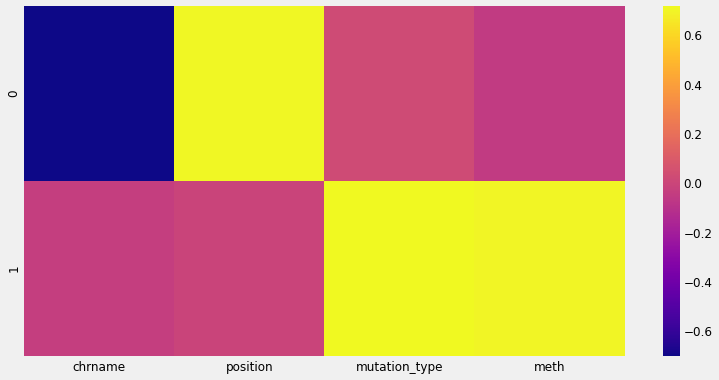

In [116]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp_1,cmap='plasma',)

In [118]:
df_k.head()

chrname   position  mutation_type  meth  cluster
0        2  209694558              2     0        0
1        2   55295644              3     0        0
2        6  151548416              4     0        0
3        3   41911351              5     0        0
4       10  103447445              5   109        2

In [119]:
import umap.umap_ as umap

In [120]:
reducer = umap.UMAP()

In [121]:
df_clust = df_k[
    [
        "chrname",
        "mutation_type",
        "position",
       
    ]
].values
df_clust_data = StandardScaler().fit_transform(df_clust)

In [122]:
embedding = reducer.fit_transform(df_clust_data)
embedding.shape

(5137, 2)

Text(0.5, 1.0, 'Projection of population-based dataset colored by Methylation')

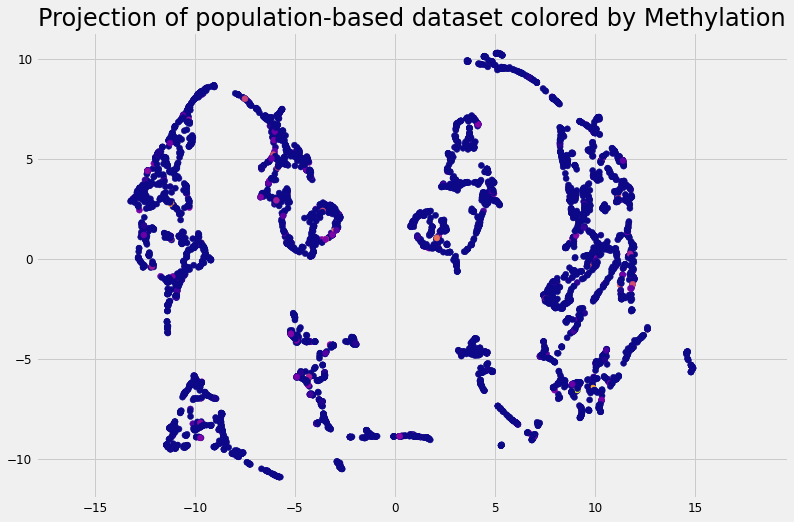

In [123]:
plt.scatter(embedding[:,0],embedding[:,1],c=df_k['meth'],cmap='plasma')

plt.gca().set_aspect('equal', 'datalim')
plt.title('Projection of population-based dataset colored by Methylation', fontsize=24)

In [124]:
df_clust1 = df_k[
    [
        "chrname",
        "meth",
        "position",
       
    ]
].values
df_clust_data1 = StandardScaler().fit_transform(df_clust1)

In [125]:
embedding1 = reducer.fit_transform(df_clust_data1)
embedding1.shape

(5137, 2)

Text(0.5, 1.0, 'Projection of population-based dataset colored by Mutation Types')

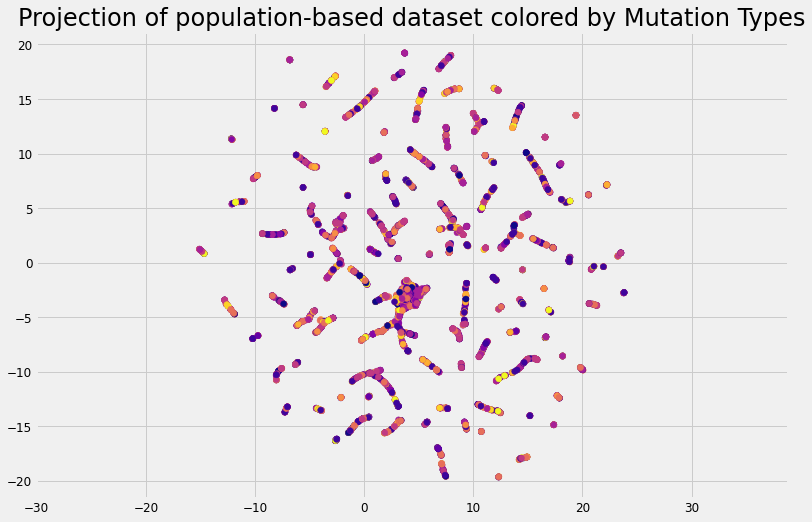

In [126]:
plt.scatter(embedding1[:,0],embedding1[:,1],c=df_k['mutation_type'],cmap='plasma')

plt.gca().set_aspect('equal', 'datalim')
plt.title('Projection of population-based dataset colored by Mutation Types', fontsize=24)

# Tuning models with with RandomizedSearchCV and GridSearchCV

In [127]:
## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

In [128]:
def evaluate_preds(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision =precision_score(y_true, y_pred)
    recall =recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict

In [129]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)


grid = {"n_estimators": [10, 100, 200, 500, 1000, 1500],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

#Shuffle the data
df_new_shuffled = df_new.sample(frac=1)

#Split into X & y
X = df_new_shuffled.drop('IsCellLine', axis = 1)
y = df_new_shuffled["IsCellLine"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#RandomForestClassifier
clf_1 = RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf_1,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

#Fit the RandomizedSearchCV Version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1500]},
                   verbose=2)

In [130]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [131]:
rs_y_pred = rs_clf.predict(X_test)

#evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_pred)

Acc: 72.50%
Precision: 0.59
Recall: 0.06
F1: 0.11


In [132]:
from sklearn.model_selection import GridSearchCV


grid2 = {"n_estimators": [ 200, 500, 1000],
        "max_depth": [ 5, 10, 20],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [4, 6, 8],
        "min_samples_leaf": [2, 4]}

#Shuffle the data
df_new_shuffled = df_new.sample(frac=1)

#Split into X & y
X = df_new_shuffled.drop('IsCellLine', axis = 1)
y = df_new_shuffled["IsCellLine"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#RandomForestClassifier
clf_1 = RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf_1,
                      param_grid=grid2,
                            cv=5,
                            verbose=2)

#Fit the GridSearchCV version of clf

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 13.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [200, 500, 1000]},
             verbose=2)

In [133]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 500}

In [134]:
gs_y_pred = gs_clf.predict(X_test)

#evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_pred)

Acc: 72.93%
Precision: 0.49
Recall: 0.08
F1: 0.14


In [135]:
#RandomSearchCV with LogisticRegression

In [136]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [137]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [138]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [139]:
rs_log_reg.score(X_test, y_test)

0.73

In [140]:
#Tunning LogisticRegression with GridSearchCV

In [141]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [142]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [143]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.73

In [144]:
clf = LogisticRegression()

In [145]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [146]:
# Check coef_
clf.coef_

array([[-5.38890354e-15, -8.83357658e-09, -1.45989512e-15]])

In [147]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'chrname': -5.388903543523498e-15,
 'position': -8.833576584326498e-09,
 'mutation_type': -1.4598951216990234e-15}

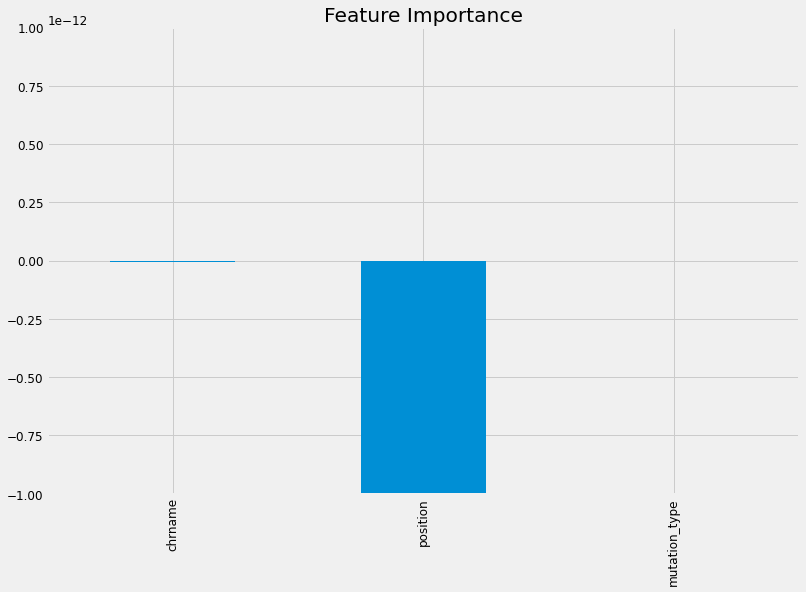

In [148]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

# KMeans Clustering

*Identify hidden clusters of mutations from the TARGET-NBL data 

*Releveant columns/features: chrname, position, mutation_type, IsNewPAM, IsGene, IsPromoter 

In [154]:
df_t = pd.read_csv('/Users/ganiyuopeyemi/Desktop/Data Science in Life Science/TARGET-NBL-population_mutations_PAM_Hg38_annotated.csv')

In [155]:
df_t.head()

Unnamed: 0 seqnames   position strand mutation_type  IsNewPAM  Genes  \
0           1    chr17   47619753      +           T>A     False   9520   
1           2     chr2  209694558      +           C>A     False   4133   
2           3     chr2   55295644      +           A>C     False    NaN   
3           4     chr6  151548416      +           G>C     False  80129   
4           5     chr3   41911351      +           C>T     False    NaN   

  Promoters  IsGene  IsPromoter  
0       NaN    True       False  
1      4133    True        True  
2       NaN   False       False  
3       NaN    True       False  
4       NaN   False       False

In [156]:
df_t.drop(['Unnamed: 0','strand','Genes','Promoters'],axis =1, inplace = True)

In [157]:
df_t.head()

seqnames   position mutation_type  IsNewPAM  IsGene  IsPromoter
0    chr17   47619753           T>A     False    True       False
1     chr2  209694558           C>A     False    True        True
2     chr2   55295644           A>C     False   False       False
3     chr6  151548416           G>C     False    True       False
4     chr3   41911351           C>T     False   False       False

In [158]:
df_t["seqnames"] = df_t["seqnames"].map({"chr1" : 1,"chr2" : 2,"chr3" : 3, "chr4" : 4,"chr5" : 5, "chr6" : 6, "chr7" : 7, "chr8" : 8, "chr9" : 9, "chr10" : 10,"chr11" : 11, "chr12" : 12, "chr13" : 13, "chr14" : 14, "chr15" : 15, "chr16" : 16, "chr17" : 17, "chr18" : 18, "chr19" : 19, "chr20" : 20, "chr21" : 21, "chr22" : 22,"chrX" : 23, "chrY" : 24})
df_t['mutation_type'] = df_t['mutation_type'].map({"T>A" : 1, "C>A" : 2, "A>C" : 3, "G>C" : 4, "C>T" : 5, "G>T" : 6, "T>G" : 7, "G>A" : 8, "C>G" : 9, "T>C" : 10, "A>T" : 11, "A>G" : 12})

In [159]:
df_t.shape

(5138, 6)

In [161]:
df_t.IsNewPAM.value_counts()

False    4920
True      218
Name: IsNewPAM, dtype: int64

In [162]:
df_clustN = df_t[
    [
        "seqnames",
        "position",
        "mutation_type",
        "IsGene",
        "IsPromoter"
       
    ]
].values
df_clust_dataN = StandardScaler().fit_transform(df_clustN)

In [163]:
embedding_N = reducer.fit_transform(df_clust_dataN)
embedding_N.shape

(5138, 2)

Text(0.5, 1.0, 'Projection of Target-based dataset colored by PAM site')

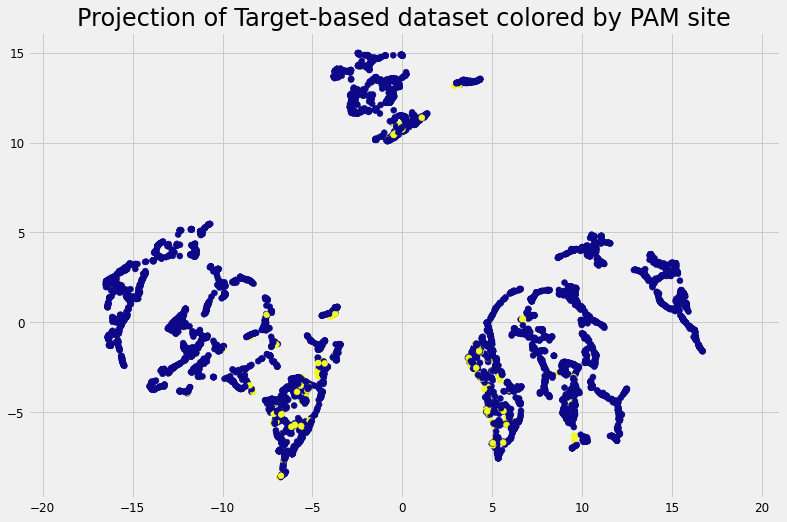

In [164]:
plt.scatter(embedding_N[:,0],embedding_N[:,1],c=df_t['IsNewPAM'],cmap='plasma')

plt.gca().set_aspect('equal', 'datalim')
plt.title('Projection of Target-based dataset colored by PAM site', fontsize=24)

In [165]:
df_clustM = df_t[
    [
        "seqnames",
        "position",
        "IsNewPAM",
        "mutation_type",
        "IsGene"
        
        
       
    ]
].values
df_clust_dataM = StandardScaler().fit_transform(df_clustM)

In [166]:
embedding_M = reducer.fit_transform(df_clust_dataM)
embedding_M.shape

(5138, 2)

Text(0.5, 1.0, 'Projection of population-based dataset colored by Gene Annotation')

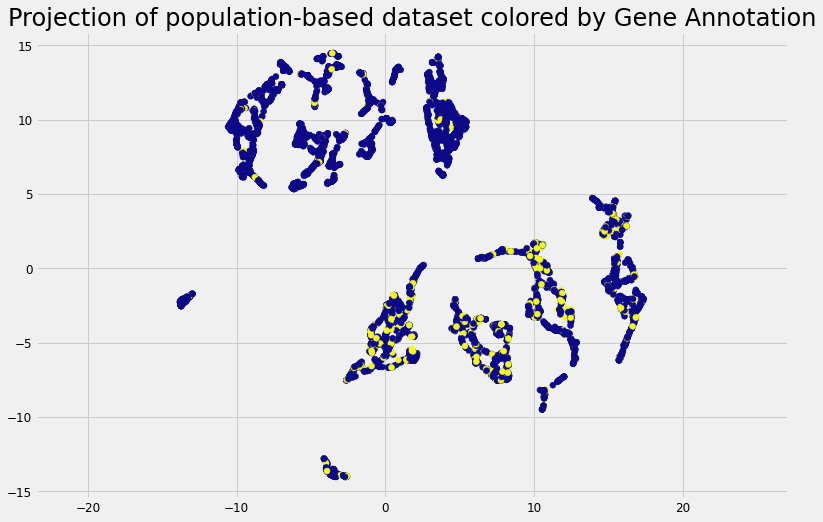

In [167]:
plt.scatter(embedding_M[:,0],embedding_M[:,1],c=df_t['IsPromoter'],cmap='plasma')

plt.gca().set_aspect('equal', 'datalim')
plt.title('Projection of population-based dataset colored by Gene Annotation', fontsize=24)